# Perform CRUD Operation for Student Database on AWS using Serverless Services
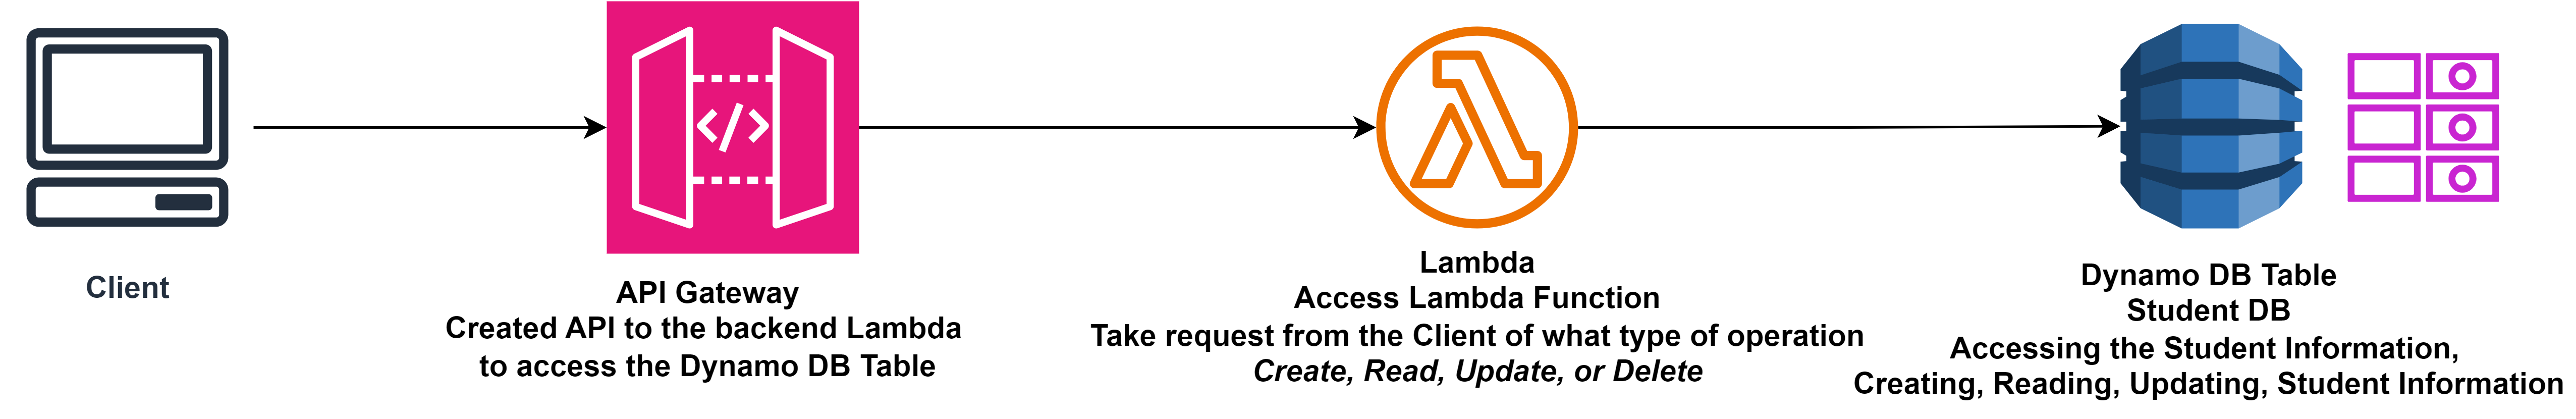

1. Creating a Dynamo DB Table which consists of the Student Information like <br>
        1.1 Student Roll Number (Partition Key) Primary Key
        1.2 Student Name (Sort Key) Sorts the Values according to the Alphabetical Order
        1.3 Phone Number
        1.4 Email
2. Create three more functions to read, update, and delete the values
3. Access the Dynamo DB Table through Serverless Function (Lambda)
4. Finally, access the Lambda Function through API Gateway by creating endpoint to the Lambda



AWS Services can be implemented and called through three different ways
1. Command Line Interface (CLI)
2. SDK
3. AWS Management Console

In [ ]:
!pip3 install boto3
import boto3
import json
dynamo_db_client = boto3.client('dynamodb')

In [ ]:
#Create a Student DB
create_table = dynamo_db_client.create_table(
    AttributeDefinitions = [
        {
            'AttributeName':'RollNo', # Partition Key -- Primary Key -- These values in the table should be unique
            'AttributeType':'S'
        },
        {
            'AttributeName':'Name', # Sort Key -- Arrange the names in the Alphabetical Order
            'AttributeType':'S'
        }
        
    ],
    TableName = 'StudentDB',
    KeySchema = [
        {
            'AttributeName':'RollNo',
            'KeyType':'HASH' #--> HASH
        },
        {
            'AttributeName':'Name',
            'KeyType':'RANGE' #--> RANGE
        }
    ],
    ## The number of attributes in the Key Schema == No of attributes in the Attr Definitions
    BillingMode = 'PROVISIONED',
    ProvisionedThroughput = {
        'ReadCapacityUnits' : 10,
        'WriteCapacityUnits' : 10
    }
)

In [ ]:
# Let's add new item to the table 
# Creating new items in the table
RollNo = ['ABC1234','ADEDVC','DEV1452','DEVESDEC']
Name = ['Devin','Mark','Raghul','Drake']
for i in range(len(Name)):
    putstudentvalues = dynamo_db_client.put_item(
        TableName = "StudentDB",
        Item = {
            'RollNo':
            {
                'S':RollNo[i]
            },
            'Name':
            {
                'S':Name[i]
            }
            #'RollNo':RollNo[i] -- This will not work
        }
    )

In [ ]:
# Read a Value in the table
RollNo = ['ABC1234','ADEDVC','DEV1452','DEVESDEC']
Name = ['Devin','Mark','Raghul','Drake']
email = ['devin@123mail.com','mark@gmail.com','raghul@gmail.com','drake@ymail.com']
phoneno = ['245751574','6565862352','65646451545','6464454656']
read_value = dynamo_db_client.get_item(
    TableName = 'StudentDB',
    Key = {
        'RollNo': {
            'S':'DEV1452' #-- Partition Key
        },
        'Name': {
            'S':'Raghul' #-- Sort Key 
        }
    }
)
if 'Item' in read_value.keys():
    print(json.dumps(read_value['Item'], indent = 4))
else:
    print("No item found")

In [ ]:
# Update a value 
def update_values(rollno, Name, email, phoneno):
    try:
        update_value = dynamo_db_client.update_item(
            TableName = "StudentDB",
            Key = {
                'RollNo': {
                    'S':rollno
                },
                'Name': {
                    'S':Name
                }
            },
            UpdateExpression = "set Email=:e, PhoneNo=:ph", #-- If the attribute is not there in the Table -- It will create a new attribute
            #--If the attribute is there in the table -- It will update the values for the particular keys 
            ExpressionAttributeValues = {
                ":e" : {
                    'S':email
                },
                ":ph" :{
                    'N':phoneno
                }
            },
            ReturnValues = "UPDATED_NEW"
        )
    except ClientError as err:
        print(err)
    return update_value

In [ ]:
print(update_values("DEVESDEC","Drake","drake@45783@gmail.com","11114268475"))

In [ ]:
#Delete a Value
def delete_value(rollno, Name):
    try:
        delete = dynamo_db_client.delete_item(
        TableName = 'StudentDB',
        Key = {
            'RollNo': {
                'S':rollno 
            },
            'Name': {
                'S':Name 
            }
        }
        )
        return True
    except ClientError as err:
        print(err)
    return False

In [ ]:
print(delete_value('DEV1452','Raghul'))

In [ ]:
#Jinja 2 Template -- Lambda Function Code directly here at Jupyter
#Lambda Helper Function -- Directly put the Lambda Code

import boto3
import json

dynamo_db_client = boto3.client(
    service = 'dynamodb',
    region = 'us-east-1'
)

def create_table(table_name, partitionkey,sortkey, attribute1, attribute2):
    create_table = dynamo_db_client.create_table(
    AttributeDefinitions = [
        {
            'AttributeName':attribute1,
            'AttributeType':'S'
        },
        {
            'AttributeName':attribute2,
            'AttributeType':'S'
        },
    ],
    TableName = table_name,
    KeySchema = [
        {
            'AttributeName':partitionkey,
            'KeyType':'HASH'
        },
        {
            'AttributeName':sortkey,
            'KeyType':'RANGE'
        }
    ],
    BillingMode = 'PROVISIONED',
    ProvisionedThroughput = {
        'ReadCapacityUnits' : 10,
        'WriteCapacityUnits' : 10
    }
    )
    print(f"The Table {table_name} has been created in US-East 1 Region successfully")
    return True

def put_values(table_name):
    RollNo = ['ABC1234','ADEDVC','DEV1452','DEVESDEC']
    Name = ['Devin','Mark','Raghul','Drake']
    for i in range(len(Name)):
        putstudentvalues = dynamo_db_client.put_item(
            TableName = "StudentDB",
            Item = {
                'RollNo':
                {
                    'S':RollNo[i]
                },
                'Name':
                {
                    'S':Name[i]
                }
            }
        )
    print(f"The values are added in the table {table_name} successfully")
    return True

def read_values(table_name, rollno, name):
    read_value = dynamo_db_client.get_item(
    TableName = table_name,
    Key = {
        'RollNo': {
            'S':rollno
        },
        'Name': {
            'S':name
        }
    }
    )
    return json.dumps(read_value['Item'],indent = 4)

def update_values(rollno, Name, email, phoneno):
    try:
        update_value = dynamo_db_client.update_item(
            TableName = "StudentDB",
            Key = {
                'RollNo': {
                    'S':rollno
                },
                'Name': {
                    'S':Name
                }
            },
            UpdateExpression = "set Email=:e, PhoneNo=:ph",
            ExpressionAttributeValues = {
                ":e" : {
                    'S':email
                },
                ":ph" :{
                    'N':phoneno
                }
            },
            ReturnValues = "UPDATED_NEW"
        )
    except ClientError as err:
        print(err)
    return True
def delete_value(rollno, Name):
    try:
        delete = dynamo_db_client.delete_item(
        TableName = 'StudentDB',
        Key = {
            'RollNo': {
                'S':rollno
            },
            'Name': {
                'S':Name
            }
        }
        )
        return True
    except ClientError as err:
        print(err)
    return False
    
def lambda_handler(event, context):





## To invoke directly from the Notebook, use Jinja 2 Template to load the template in Lambda and call the API